In [ ]:
#import tf-nightly for r-squared method
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.9/488.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.0/441.0 kB 32.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3


In [2]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import scipy.stats as st
import tensorflow as tf

In [16]:
#import and read data
behavioral_risk_df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
behavioral_risk_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [17]:
#look at unique list of data columns
unique_list = []
for c in behavioral_risk_df:
  unique_list.append({"column":c, "unique_values":len(behavioral_risk_df[c].unique())})
unique_list_df = pd.DataFrame(unique_list)
unique_list_df = unique_list_df.set_index("column", drop=True)
unique_list_df

,unique_values
column,
YearStart,11
YearEnd,11
LocationAbbr,55
LocationDesc,55
Datasource,1
Class,3
Topic,3
Question,9
Data_Value_Unit,1


In [18]:
#look at column keys
behavioral_risk_df.keys()

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [19]:
#remove unwanted columns
behavioral_risk_df = behavioral_risk_df.drop(columns=['YearEnd', 'LocationAbbr', 'Datasource',
       'Class', 'Topic', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'StratificationCategoryId1', 'StratificationID1'])

In [20]:
#look at data points per year
behavioral_risk_df["YearStart"].value_counts()

2017    13860
2019    13365
2015    10584
2013    10248
2011    10192
2021     7700
2016     4620
2018     4620
2020     4536
2014     4536
2012     4368
Name: YearStart, dtype: int64

In [21]:
#drop National from LocationDesc, Total from Stratification1, and NaN from Data_Value
behavioral_risk_df = behavioral_risk_df.loc[(behavioral_risk_df["LocationDesc"] != "National") & \
 (behavioral_risk_df["Data_Value"].notna()) & (behavioral_risk_df["Stratification1"] != "Total")]
behavioral_risk_df.head()

,YearStart,LocationDesc,Question,Data_Value,Stratification1
1,2014,Guam,Percent of adults aged 18 years and older who ...,29.3,High school graduate
5,2015,Guam,Percent of adults who achieve at least 150 min...,27.4,Hispanic
6,2012,Wyoming,Percent of adults aged 18 years and older who ...,48.5,American Indian/Alaska Native
7,2012,District of Columbia,Percent of adults aged 18 years and older who ...,31.6,Less than high school
8,2015,Puerto Rico,Percent of adults who engage in no leisure-tim...,38.1,"$25,000 - $34,999"


In [22]:
#peek at the data
behavioral_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75110 entries, 1 to 88627
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearStart        75110 non-null  int64  
 1   LocationDesc     75110 non-null  object 
 2   Question         75110 non-null  object 
 3   Data_Value       75110 non-null  float64
 4   Stratification1  75110 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [23]:
#pivot questions to columns
behavioral_risk_df = behavioral_risk_df.pivot(index=["YearStart", "LocationDesc", "Stratification1"], columns=["Question"], values="Data_Value")
behavioral_risk_df.head()

Question                                   Percent of adults aged 18 years and older who have an overweight classification  \
YearStart LocationDesc Stratification1                                                                                       
2011      Alabama      $15,000 - $24,999                                                31.9                                 
                       $25,000 - $34,999                                                35.7                                 
                       $35,000 - $49,999                                                36.6                                 
                       $50,000 - $74,999                                                36.1                                 
                       $75,000 or greater                                               38.5                                 

Question                                   Percent of adults aged 18 years and older who have obesity  \
YearStart LocationDesc Stratification1                                                                  
2011      Alabama      $15,000 - $24,999                                                34.8            
                       $25,000 - $34,999                                                35.8            
                       $35,000 - $49,999                                                32.3            
                       $50,000 - $74,999                                                34.1            
                       $75,000 or greater                                               28.8            

Question                                   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  \
YearStart LocationDesc Stratification1                                                                                                                                                                                                            
2011      Alabama      $15,000 - $24,999                                                36.7                                                                                                                                                      
                       $25,000 - $34,999                                                39.3                                                                                                                                                      
                       $35,000 - $49,999                                                48.7                                                                                                                                                      
                       $50,000 - $74,999                                                41.3                                                                                                                                                      
                       $75,000 or greater                                               53.5                                                                                                                                                      

Question                                   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week  \
YearStart LocationDesc Stratification1                                                                                                                                                                                                                                                             
2011      Alabama      $15,000 - $24,999                                                10.9   

In [24]:
#reset index with year, location, and stratification
behavioral_risk_df = behavioral_risk_df.reset_index()
behavioral_risk_df

Question,YearStart,LocationDesc,Stratification1,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults aged 18 years and older who have obesity,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,Percent of adults who report consuming fruit less than one time daily,Percent of adults who report consuming vegetables less than one time daily
0,2011,Alabama,"$15,000 - $24,999",31.9,34.8,36.7,10.9,19.6,20.2,38.6,NaN,NaN
1,2011,Alabama,"$25,000 - $34,999",35.7,35.8,39.3,12.0,25.0,23.4,35.2,NaN,NaN
2,2011,Alabama,"$35,000 - $49,999",36.6,32.3,48.7,16.5,28.3,27.0,27.9,NaN,NaN
3,2011,Alabama,"$50,000 - $74,999",36.1,34.1,41.3,16.4,23.2,28.8,25.6,NaN,NaN
4,2011,Alabama,"$75,000 or greater",38.5,28.8,53.5,21.2,28.5,29.4,20.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14127,2021,Wyoming,"Less than $15,000",31.5,34.9,NaN,NaN,NaN,NaN,37.3,53.3,32.1
14128,2021,Wyoming,Less than high school,38.0,32.7,NaN,NaN,NaN,NaN,36.7,45.6,24.1
14129,2021,Wyoming,Male,41.2,32.4,NaN,NaN,NaN,NaN,20.5,45.4,21.2
14130,2021,Wyoming,Non-Hispanic White,36.6,31.3,NaN,NaN,NaN,NaN,22.3,42.5,18.1


In [36]:
#filter for only years that asked all physical activity questions
behavioral_risk_df = behavioral_risk_df.loc[behavioral_risk_df["YearStart"].isin([2011,2013,2015,2017,2019])]

In [37]:
#drop fruit and vegetable questions
behavioral_risk_df = behavioral_risk_df.drop(columns=["Percent of adults who report consuming fruit less than one time daily","Percent of adults who report consuming vegetables less than one time daily"])

In [38]:
#drop any NaN's
behavioral_risk_df = behavioral_risk_df.dropna()
behavioral_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6289 entries, 0 to 11523
Data columns (total 10 columns):
 #   Column                                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                 --------------  -----  
 0   YearStart                                                                                                                                                                                                                                              6289 non-null   int64  
 1   LocationDesc                                               

In [39]:
#isolate obesity question
X = behavioral_risk_df.drop(columns=["Percent of adults aged 18 years and older who have obesity"])
y = behavioral_risk_df["Percent of adults aged 18 years and older who have obesity"]

In [40]:
#get dummies to encode stratification and location categories
X = pd.get_dummies(X)
X.head()

,YearStart,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,LocationDesc_Alabama,LocationDesc_Alaska,LocationDesc_Arizona,...,Stratification1_Hawaiian/Pacific Islander,Stratification1_High school graduate,Stratification1_Hispanic,"Stratification1_Less than $15,000",Stratification1_Less than high school,Stratification1_Male,Stratification1_Non-Hispanic Black,Stratification1_Non-Hispanic White,Stratification1_Other,Stratification1_Some college or technical school
0,2011,31.9,36.7,10.9,19.6,20.2,38.6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,35.7,39.3,12.0,25.0,23.4,35.2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,36.6,48.7,16.5,28.3,27.0,27.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,36.1,41.3,16.4,23.2,28.8,25.6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,38.5,53.5,21.2,28.5,29.4,20.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#create optimized model
optimized_model = tf.keras.models.Sequential()
optimized_model.add(tf.keras.layers.Dense(units=64, activation="leaky_relu", input_dim=87))
optimized_model.add(tf.keras.layers.Dense(units=32, activation="leaky_relu"))
optimized_model.add(tf.keras.layers.Dense(units=16, activation="leaky_relu"))
optimized_model.add(tf.keras.layers.Dense(units=8, activation="relu"))
optimized_model.add(tf.keras.layers.Dense(units=4, activation="relu"))
optimized_model.add(tf.keras.layers.Dense(units=1))
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
optimized_model.compile(loss="mse", optimizer=opt, metrics=["mean_absolute_percentage_error"])

In [ ]:
#model summary
optimized_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                5632      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 8417 (32.88 KB)
Trainable params: 8417 (

In [ ]:
#train the model
optimized_model_fit = optimized_model.fit(X_train_scaled, y_train, epochs=1000, validation_data=(X_test_scaled, y_test))

Epoch 1/1000
158/158 [==============================] - 3s 6ms/step - loss: 959.7371 - mean_absolute_percentage_error: 100.9662 - val_loss: 979.1207 - val_mean_absolute_percentage_error: 100.8664
Epoch 2/1000
158/158 [==============================] - 1s 4ms/step - loss: 956.2393 - mean_absolute_percentage_error: 100.7653 - val_loss: 975.8889 - val_mean_absolute_percentage_error: 100.6789
Epoch 3/1000
158/158 [==============================] - 1s 4ms/step - loss: 953.3304 - mean_absolute_percentage_error: 100.5956 - val_loss: 973.1935 - val_mean_absolute_percentage_error: 100.5217
Epoch 4/1000
158/158 [==============================] - 1s 5ms/step - loss: 950.8912 - mean_absolute_percentage_error: 100.4539 - val_loss: 970.9609 - val_mean_absolute_percentage_error: 100.3907
Epoch 5/1000
158/158 [==============================] - 1s 4ms/step - loss: 948.8658 - mean_absolute_percentage_error: 100.3338 - val_loss: 969.0908 - val_mean_absolute_percentage_error: 100.2798
Epoch 6/1000
158/158

In [ ]:
#prepare predictions and true values for tf-nightly R2 score
y_pred = optimized_model.predict(X_test_scaled)
y_true = y_test.values.reshape(-1, 1)

40/40 [==============================] - 0s 2ms/step


In [ ]:
#get R2 score
metric = tf.keras.metrics.R2Score()
metric.update_state(y_true, y_pred)
result = metric.result()
print(f"R-Squared Value = {result.numpy()}")

R-Squared Value = 0.8324604034423828


In [ ]:
#evaluate model loss and MAPE
test_results = optimized_model.evaluate(X_test_scaled, y_test, verbose=2)

40/40 - 0s - loss: 9.0807 - mean_absolute_percentage_error: 8.2015 - 67ms/epoch - 2ms/step


In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(optimized_model_fit.history, index=range(1,len(optimized_model_fit.history["loss"])+1))

<Axes: >

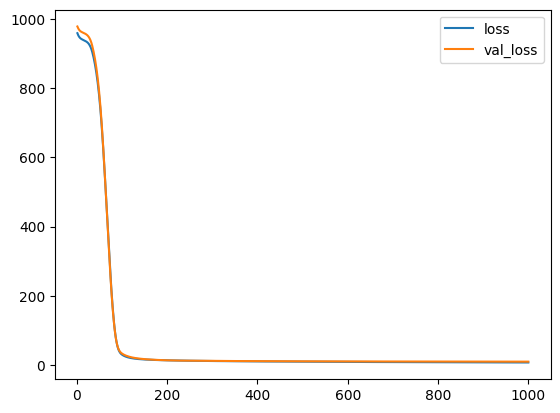

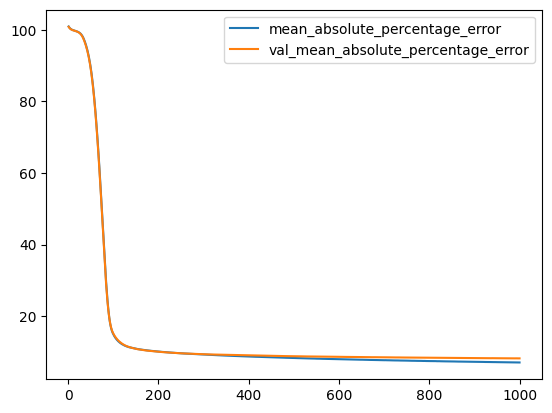

In [ ]:
# Plot the loss
history_df.plot(y=["loss","val_loss"])
history_df.plot(y=["mean_absolute_percentage_error","val_mean_absolute_percentage_error"])

In [ ]:
#Export model to HDF5 file
optimized_model.save("Obesity_Prediction_opt.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3052: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
#load model
obesity_model = tf.keras.models.load_model("Obesity_Prediction_r2_83.h5")

In [101]:
#Import hypothetical data to see what the predictions are
hypothetical_df = pd.read_csv("Hypothetical_Data.csv")
hypothetical_df

,YearStart,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,LocationDesc_Alabama,LocationDesc_Alaska,LocationDesc_Arizona,...,Stratification1_Hawaiian/Pacific Islander,Stratification1_High school graduate,Stratification1_Hispanic,"Stratification1_Less than $15,000",Stratification1_Less than high school,Stratification1_Male,Stratification1_Non-Hispanic Black,Stratification1_Non-Hispanic White,Stratification1_Other,Stratification1_Some college or technical school
0,2023,35,50,18,33,30,20,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2023,35,50,18,33,30,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023,35,50,18,33,30,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023,35,50,18,33,30,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,35,50,18,33,30,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2023,35,50,18,33,30,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# Scale the data

X_hyp_scaled = X_scaler.transform(hypothetical_df)
y_hyp = obesity_model.predict(X_hyp_scaled)

1/1 [==============================] - 0s 23ms/step


In [103]:
#add column to the hypothetical data to show the predictions for each row of data
hypothetical_df["PREDICTION Percent of adults aged 18 years and older who have obesity"] = [y_hyp[x].item() for x in range(len(y_hyp))]
hypothetical_df

,YearStart,Percent of adults aged 18 years and older who have an overweight classification,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Percent of adults who engage in muscle-strengthening activities on 2 or more days a week,Percent of adults who engage in no leisure-time physical activity,LocationDesc_Alabama,LocationDesc_Alaska,LocationDesc_Arizona,...,Stratification1_High school graduate,Stratification1_Hispanic,"Stratification1_Less than $15,000",Stratification1_Less than high school,Stratification1_Male,Stratification1_Non-Hispanic Black,Stratification1_Non-Hispanic White,Stratification1_Other,Stratification1_Some college or technical school,PREDICTION Percent of adults aged 18 years and older who have obesity
0,2023,35,50,18,33,30,20,0,0,0,...,0,0,1,0,0,0,0,0,0,32.256557
1,2023,35,50,18,33,30,20,0,0,0,...,0,0,0,0,0,0,0,0,0,34.428665
2,2023,35,50,18,33,30,50,0,0,0,...,0,0,0,0,0,0,0,0,0,43.412422
3,2023,35,50,18,33,30,10,0,0,0,...,0,0,0,0,0,0,0,0,0,37.663548
4,2023,35,50,18,33,30,20,0,0,0,...,0,0,0,0,0,0,0,0,0,19.198441
5,2023,35,50,18,33,30,20,0,0,0,...,0,0,0,0,0,0,0,0,0,38.789501


<Axes: >

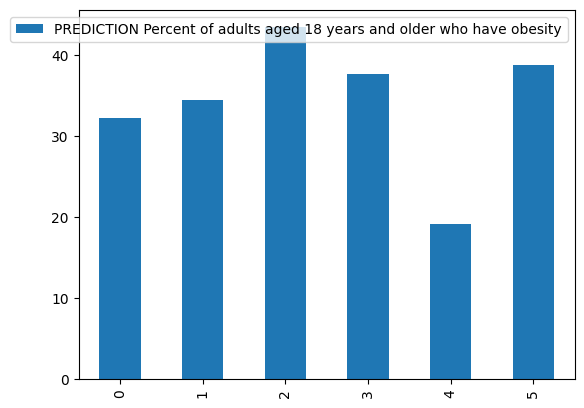

In [104]:
hypothetical_df.plot.bar(y="PREDICTION Percent of adults aged 18 years and older who have obesity")